In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
X = df.drop('class',axis=1)

In [5]:
y = df['class']

In [6]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'n_estimators': [1, 5, 10, 20, 40, 100],
    'max_depth': [3, 4, 5, 6],
}

In [17]:
gb_model = GradientBoostingClassifier()

In [20]:
grid = GridSearchCV(gb_model, param_grid, n_jobs=-1)

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [22]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [24]:
predictions = grid.predict(X_test)

In [25]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [26]:
accuracy_score(y_test, predictions)

1.0

In [28]:
confusion_matrix = confusion_matrix(y_test, predictions)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



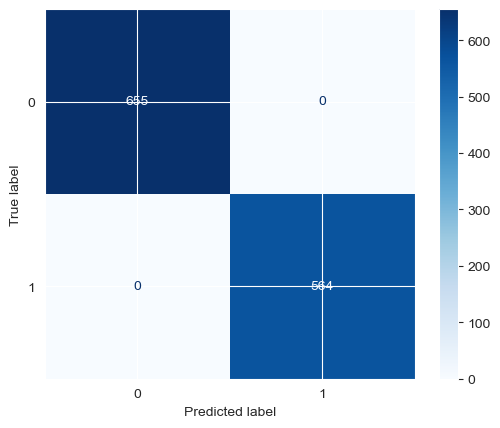

In [30]:
ConfusionMatrixDisplay(confusion_matrix).plot(cmap='Blues')

In [31]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.40406478e-16, 0.00000000e+00, 0.00000000e+00,
       6.86100715e-17, 1.04652037e-03, 0.00000000e+00, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 3.38346136e-17, 0.00000000e+00,
       1.99418987e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.31053911e-03, 5.16037152e-02, 6.24175887e-04, 1.42369319e-02,
       1.82499853e-02, 5.38481037e-04, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27126988e-02,
       1.04355233e-02, 0.00000000e+00, 2.08246989e-16, 0.00000000e+00,
       2.18747243e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.17085013e-17, 0.00000000e+00, 6.81255620e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.35970145e-01, 0.00000000e+00,
       2.48734859e-02, 3.59944816e-03, 6.25651170e-06, 8.23950030e-05,
       1.83319493e-05, 8.10118794e-04, 4.44534194e-02, 1.94664661e-04,
       0.00000000e+00, 0.00000000e+00, 6.76478844e-04, 0.00000000e+00,
      

In [32]:
pd.DataFrame(grid.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

,Feature Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.051604
stalk-surface-below-ring_y,0.044453
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_o,0.000000
stalk-color-below-ring_p,0.000000
veil-color_o,0.000000


In [34]:
feat_import = grid.best_estimator_.feature_importances_

In [35]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [36]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.404065e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,6.861007e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.093856e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [37]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.051604
stalk-surface-below-ring_y,0.044453
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_o,0.000000
stalk-color-below-ring_p,0.000000
veil-color_o,0.000000


In [38]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064664,0.0,0.0,2.082470e-16,0.000599,0.614744


In [39]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [40]:
imp_feats.sort_values('Importance')

,Importance
odor_m,0.000538
stalk-color-below-ring_w,0.000563
ring-number_t,0.000573
odor_c,0.000624
stalk-color-above-ring_n,0.000676
population_v,0.000719
stalk-surface-below-ring_s,0.000810
cap-surface_g,0.001047
population_c,0.001194
cap-color_y,0.002311


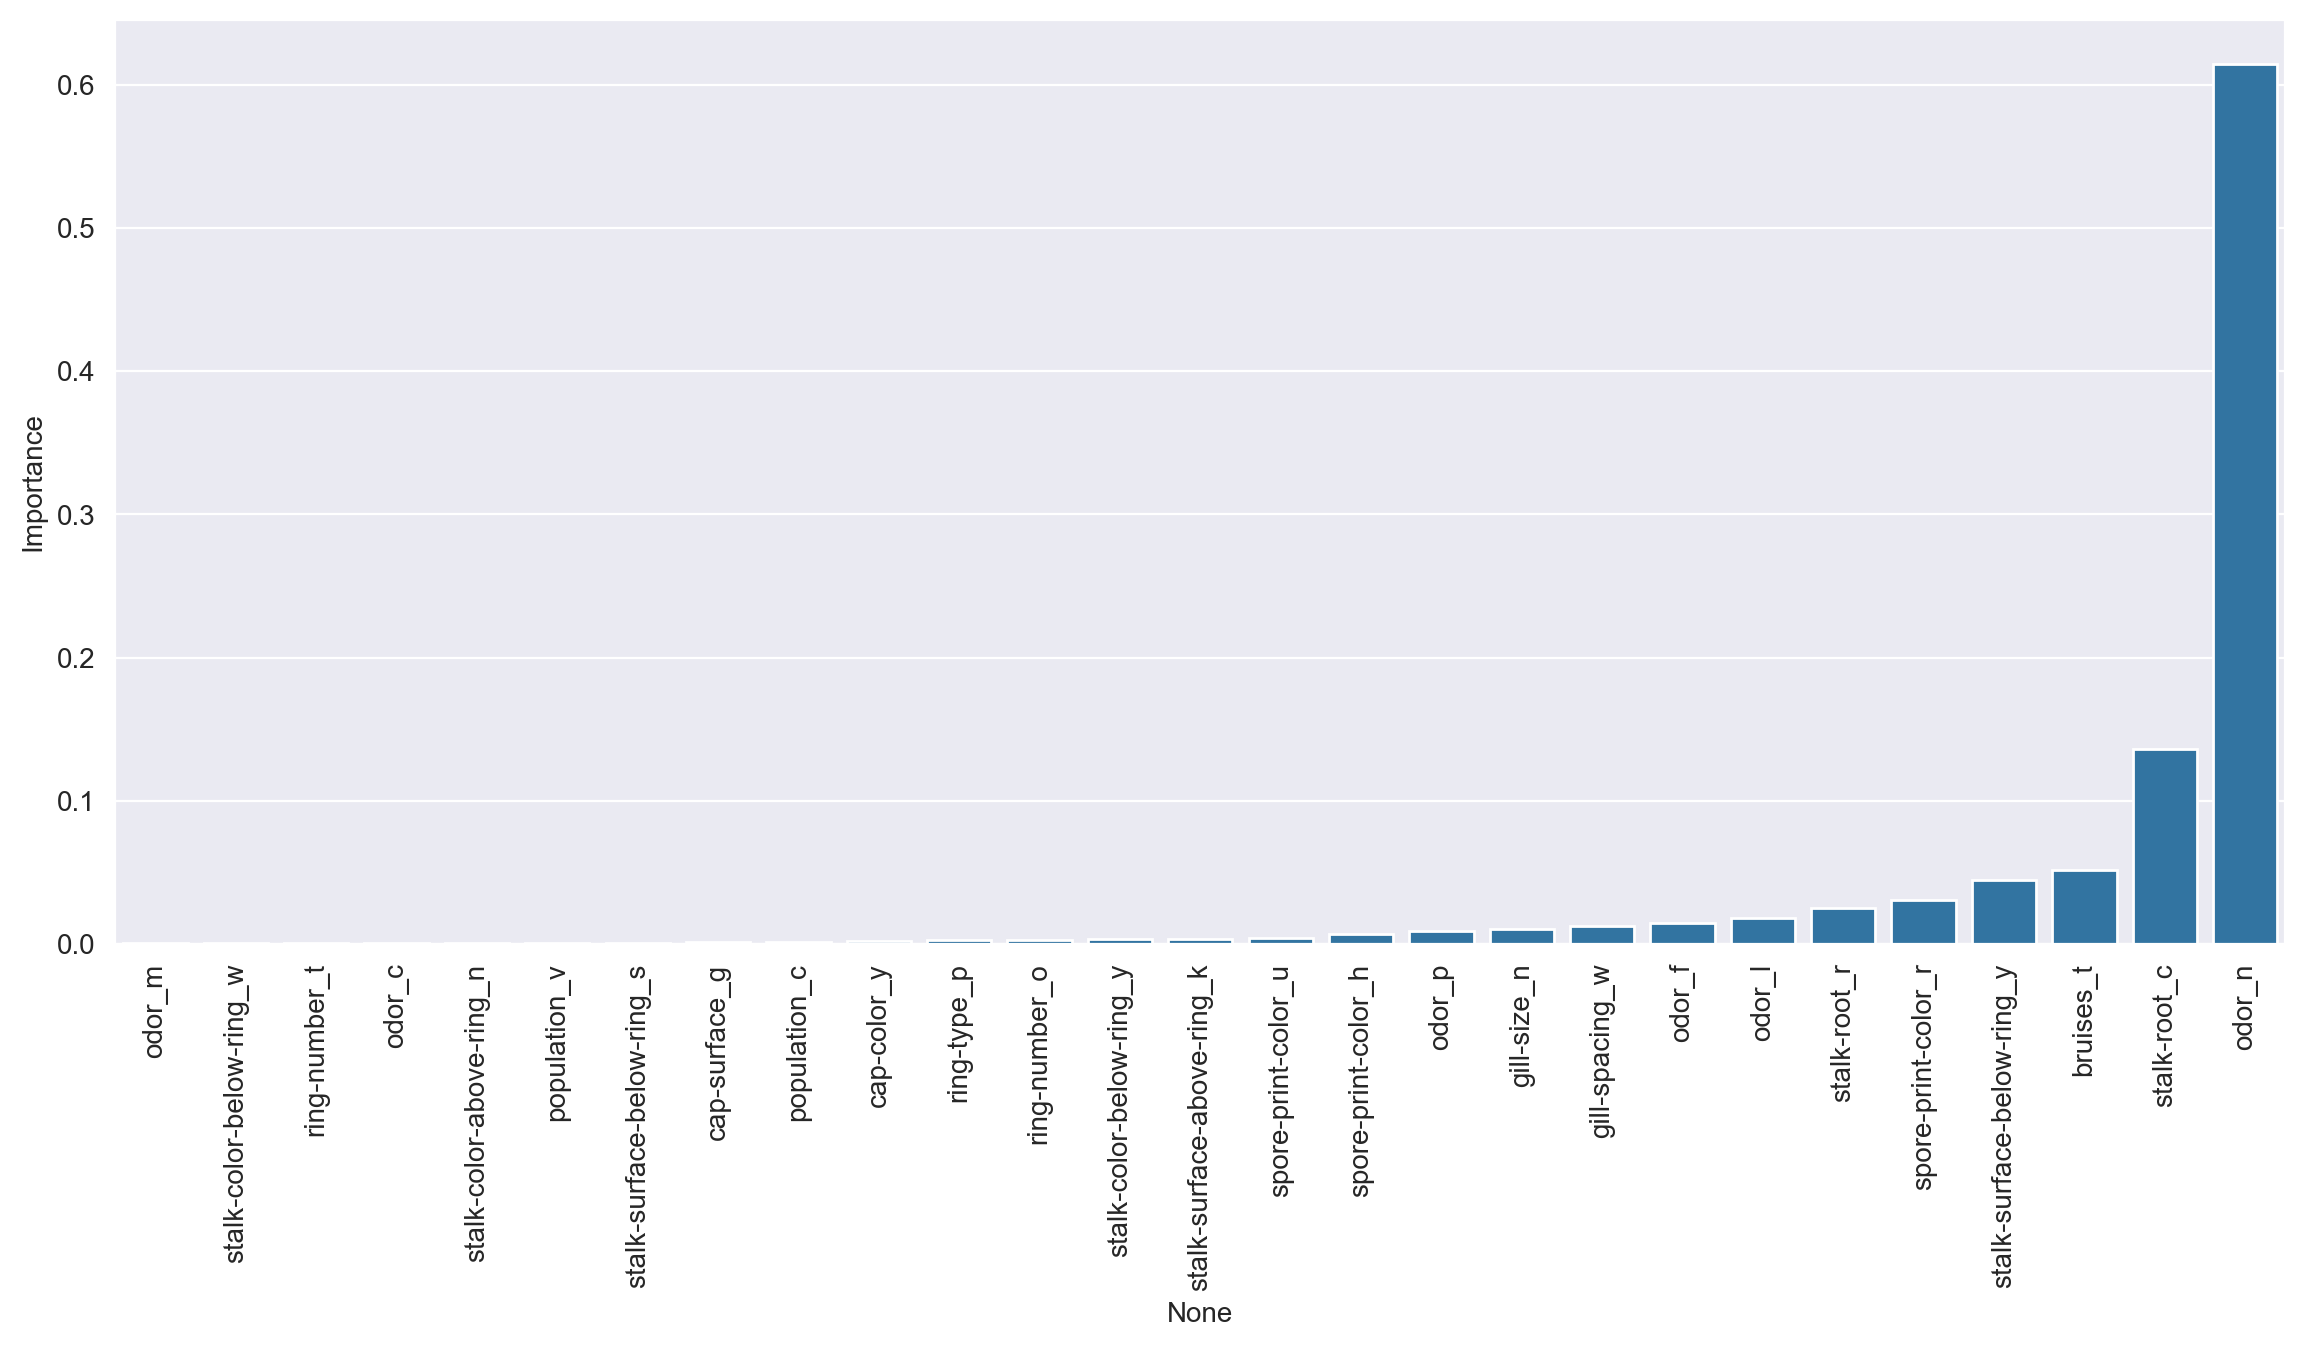

In [41]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);